In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

In [3]:
df= pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

In [ ]:
df.sample(5)

In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.shape

(5572, 5)

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df[df['Unnamed: 2'].notnull()].head(5)

In [7]:
df.rename(columns={'v1':'Label', 'v2':'Text', 'Unnamed: 2':'text2','Unnamed: 3':'text3', 'Unnamed: 4':'text4' },inplace=True)

In [8]:
df.columns

Index(['Label', 'Text', 'text2', 'text3', 'text4'], dtype='object')

In [9]:
df['text2'].fillna('',inplace=True)
df['text3'].fillna('',inplace=True)
df['text4'].fillna('',inplace=True)

C:\Users\Premier UK\AppData\Local\Temp\ipykernel_52792\3457626413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text2'].fillna('',inplace=True)
C:\Users\Premier UK\AppData\Local\Temp\ipykernel_52792\3457626413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [10]:
df['new_text']= df['Text'].astype(str)+". "+df['text2'].astype(str)+". "+df['text3'].astype(str)+". "+df['text4'].astype(str)

In [11]:
df.head(5)

,Label,Text,text2,text3,text4,new_text
0,ham,"Go until jurong point, crazy.. Available only ...",,,,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,,,,Ok lar... Joking wif u oni.... . .
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,,,,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df['new_text'].iloc[95]

'Your free ringtone is waiting to be collected. Simply text the password \\MIX\\" to 85069 to verify. Get Usher and Britney. FML.  PO Box 5249.  MK17 92H. 450Ppw 16". '

In [13]:
df.isna().sum()

Label       0
Text        0
text2       0
text3       0
text4       0
new_text    0
dtype: int64

In [14]:
df.drop(['Text','text2','text3','text4'],axis=1,inplace=True)

In [15]:
df.columns

Index(['Label', 'new_text'], dtype='object')

# Imbalanced data

In [16]:
df['Label'].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

In [17]:
df['Label']=df['Label'].map({'ham':0,'spam':1})

In [18]:
df['Label'].value_counts()

Label
0    4825
1     747
Name: count, dtype: int64

<Axes: xlabel='Label'>

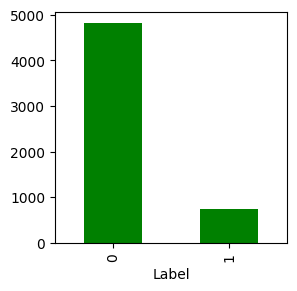

In [19]:
df['Label'].value_counts().plot(kind='bar', figsize=(3,3), color='green')

# Balancing Imbalanced data

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
X=df.drop('Label',axis=1)
y=df['Label']

In [22]:
ros=RandomOverSampler(sampling_strategy='minority')
X,y=ros.fit_resample(X,y)

<Axes: xlabel='Label'>

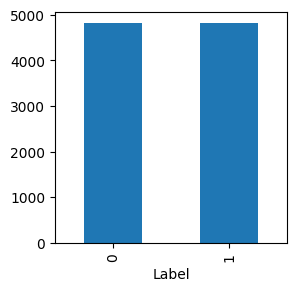

In [23]:
y.value_counts().plot(kind='bar',figsize=(3,3))

In [24]:
nlp=spacy.load('en_core_web_lg')

# Data Preprocessing

In [25]:
def clean_text(x):
    
    x=x.lower()
    data=nlp(x)
    l=[]
    for tokens in data:
        if tokens.is_punct or tokens.is_stop:
            continue
    
        l.append(tokens.lemma_)
    return l

    
    

In [26]:
X['clean_text']=X['new_text'].apply(lambda x: clean_text(x))
#clean_text('Congratulation You Won $10000 lottery ! Hurray :)')

In [29]:
X.head(5)

,new_text,clean_text,vector_text
0,"Go until jurong point, crazy.. Available only ...","[jurong, point, crazy, available, bugis, n, gr...","[-0.16113506, 0.42170903, 0.010429821, -0.1512..."
1,Ok lar... Joking wif u oni.... . .,"[ok, lar, joke, wif, u, oni]","[-0.1983848, 0.31670037, -0.013645359, -0.2227..."
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[-0.1707551, 0.41384953, 0.0027528906, -0.0860..."
3,U dun say so early hor... U c already then say...,"[u, dun, early, hor, u, c]","[-0.21428001, 0.40457818, -0.028632557, -0.213..."
4,"Nah I don't think he goes to usf, he lives aro...","[nah, think, go, usf, live]","[-0.15786237, 0.4407149, -0.036105566, -0.1291..."


In [28]:
X['vector_text']=X['clean_text'].apply(lambda x: nlp(str(x)).vector)

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X['vector_text'].values, y, test_size=0.33, random_state=42)

In [41]:
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

# Machine Learning Models

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr_model=LogisticRegression()
lr_model.fit(X_train_2d,y_train)
lr_pred=lr_model.predict(X_test_2d)
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1608
           1       0.94      0.96      0.95      1577

    accuracy                           0.95      3185
   macro avg       0.95      0.95      0.95      3185
weighted avg       0.95      0.95      0.95      3185



## SVM

In [45]:
from sklearn.svm import LinearSVC

In [47]:
svm_model=LinearSVC()
svm_model.fit(X_train_2d,y_train)
svm_pred=svm_model.predict(X_test_2d)
print(classification_report(y_test,svm_pred))

C:\Users\Premier UK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1608
           1       0.96      0.97      0.97      1577

    accuracy                           0.97      3185
   macro avg       0.97      0.97      0.97      3185
weighted avg       0.97      0.97      0.97      3185



# Testing

In [57]:
#i= 'Congratulation You Won $10000 lottery ! Hurray :)'
#i= 'I want this work done by tomorrow. Best regards Faraz'
#i= 'I am emailing you because qualified for free lifetime meal at our hotel. Share your card details to avail this offer'
df2=pd.DataFrame([i],columns=['emails'])
df2

,emails
0,I am emailing you because qualified for free l...


In [58]:
df2['clean_text']=df2['emails'].apply(lambda x: clean_text(x))
df2['vector_text']=df2['clean_text'].apply(lambda x: nlp(str(x)).vector)

In [59]:
vec=np.stack(df2['vector_text'])

In [60]:
pred1=lr_model.predict(vec)
if pred1[0]==1:
    print('Spam')

else:
    print('Ham')

Spam


In [61]:
pred2=svm_model.predict(vec)
if pred1[0]==1:
    print('Spam')

else:
    print('Ham')

Spam


# Saving SVM model for deployment

In [62]:
import pickle as pkl
filename= 'spam-svm-model.sav'
pkl.dump(svm_model,open(filename,'wb'))